# Reproducible Data Analysis in Jupyter

### From exploratory analysis to reproducible science


In [1]:
URL = 'https://data.seattle.gov/api/views/mdbt-9ykn/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x1a8a8140438>)

In [3]:
# Import pandas
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col = 'Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2014-12-01,23689,24818
2012-11-01,26062,24585
2012-12-01,18608,17761
2015-01-01,35754,24876
2017-12-01,18946,26916


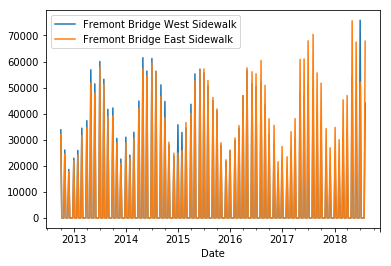

In [4]:
%matplotlib inline
data.resample('W').sum().plot();

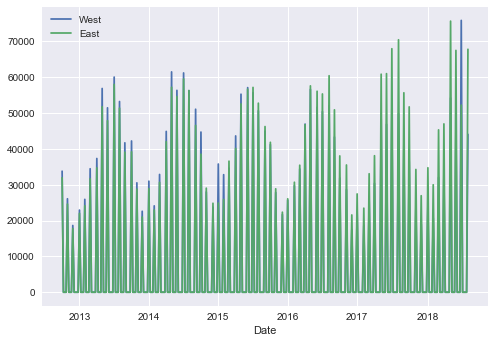

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.columns = ['West', 'East']
data.resample('W').sum().plot();

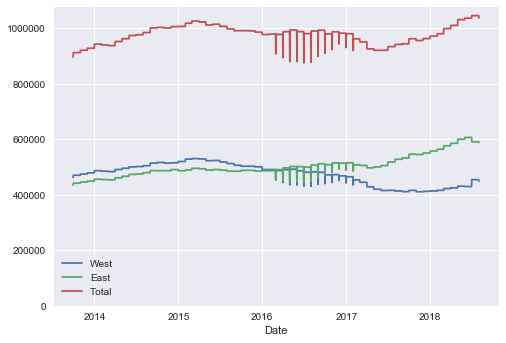

In [9]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

In [17]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-01,2012-11-01,2012-12-01,2013-01-01,2013-02-01
00:00:00,65695,50647,36369,44884,50027


In [ ]:
#pivoted.plot(legend=False, alpha=0.01);